<a href="https://colab.research.google.com/github/Noid45/TMDL2024/blob/main/Assignment_1_NicholasDion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

*Add your answer here*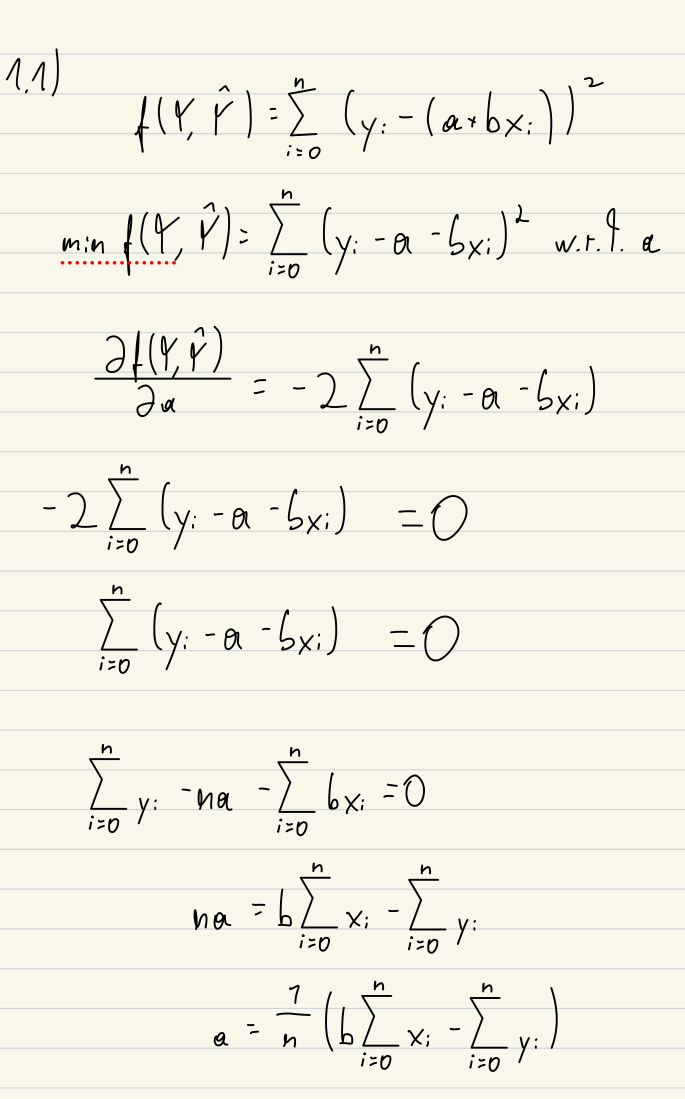

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

link text*Yes there is only one unique solution as the loss function plotted in an a and b space is a parabola. Therefore there can only be one combination of a and b such that the gradient of the parabola is 0. At slope equals 0 the minimum distance between prdicted f(x) and actual f(x) is achieved and therefore optimal a and b is found. *

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?



```
# This is formatted as code
```

No it would not change as the means squared error simply multiplies the loss function above by the constant 1/N. Multiplying a quadratic function by a constant will not change the first order condition. This due to the fact that the constant 1/N will be factored out during the differentiation. Therefore the answer to a and b must be the same as with the sum of squared errors.

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

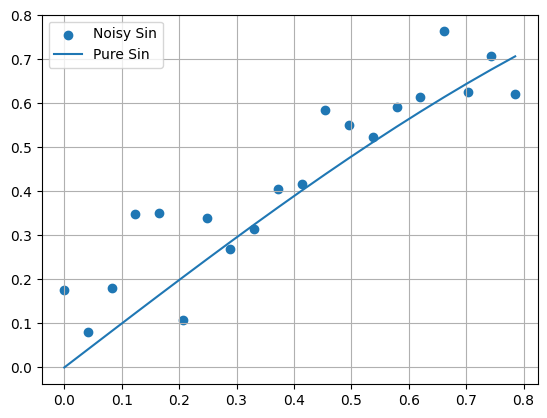

In [48]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    return np.sin(x) + noise

n_samples = 20

# TODO: create noisy function
x = np.linspace(0, np.pi/4, n_samples)
epsilon = 0.1
y = generate_sin(x, epsilon)

# TODO: create true function
x_pure = np.linspace(0, np.pi/4, n_samples)
y_pure = np.sin(x_pure)

# TODO: plot data, line
plt.scatter(x,y, label= "Noisy Sin")
plt.plot(x, y_pure, label="Pure Sin")
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

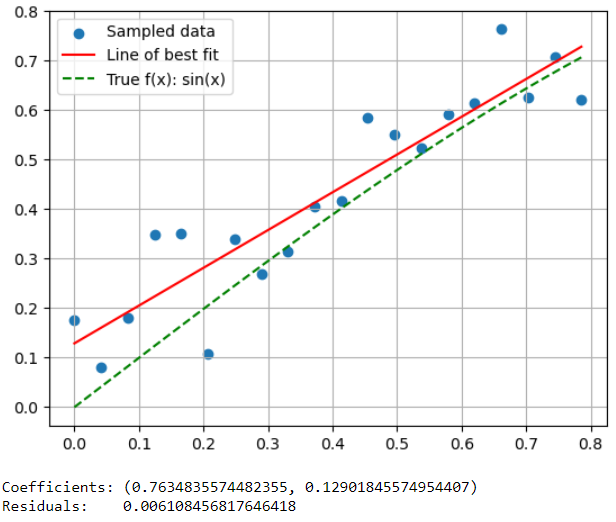

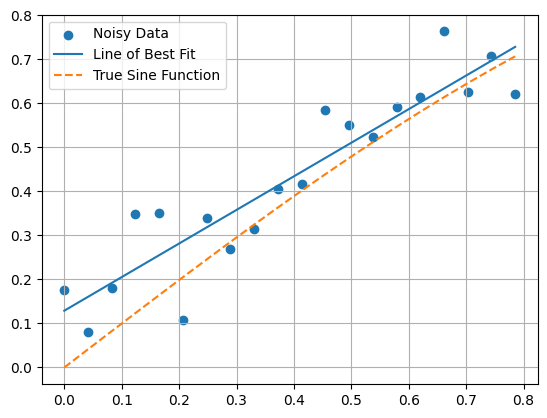

Coefficients: (0.12901845574954407, 0.7634835574482355)
Residuals:    0.12216913635292838


In [49]:
import numpy as np
import matplotlib.pyplot as plt

def compute_sos(y_true, y_pred):
  """
y_true is the true y value
y_pred is the predicted y value
The function determines the sum of least squared
  """
  sos = np.sum((y_true - y_pred)**2)
  return sos

def lin_reg(xs, ys):
  """
xs is a value
ys is a value
The function takes the x and y values as inputs and outputs the the
coefficients and residuals of the respective linear regression.
  """
  x_mean = np.mean(xs)
  y_mean = np.mean(ys)

  b = np.sum((xs - x_mean) * (ys - y_mean)) / np.sum((xs - x_mean) ** 2)
  a = y_mean - b * x_mean

  y_pred = a + b * xs
  res = compute_sos(ys, y_pred)

  return a, b, res

np.random.seed(0)

def generate_sin(x, epsilon):
  """
  X are values
  Epsilon is a value that denotes the standard
  deviation of the noise
  The function generates the noisy sin values
  """
  noise = np.random.normal(0, epsilon, len(x))
  return np.sin(x) + noise

# TODO: generate line of best fit
a, b, res = lin_reg(x,y)
y_best = b*x+a


# TODO: plot line of best fit, data, etc
plt.scatter(x, y, label="Noisy Data")
plt.plot(x, y_best, label="Line of Best Fit")
plt.plot(x, y_pure, label="True Sine Function", linestyle='--')

# make it pretty
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

Coefficients:      (0.12901845574954407, 0.7634835574482355)
Residuals:         0.12216913635292838
Coefficients (np): (0.1290184557495442, 0.7634835574482354)
Residuals (np):    0.12216913635292836


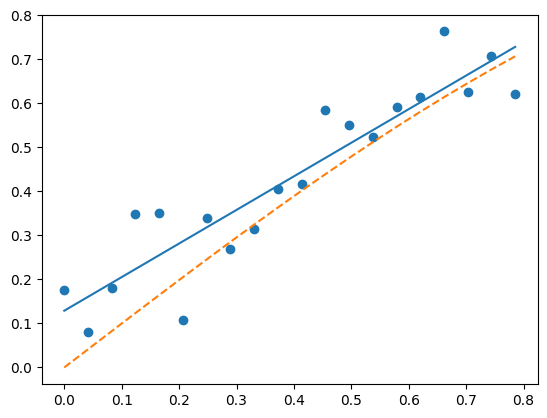

In [50]:
import numpy as np
# TODO: use np polyfit here
b_np, a_np = np.polyfit(x, y, 1)
y_best_np = a_np+b_np*x
res_np= compute_sos(y, y_best_np)

# TODO: plot everything you need to
plt.scatter(x, y, label="Noisy Data")
plt.plot(x, y_best_np, label="Line of Best Fit")
plt.plot(x, y_pure, label="True Sine Function", linestyle='--')

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)

*Add your text answer here*

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

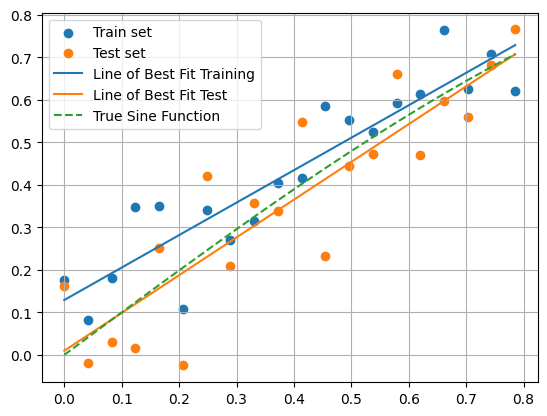

Coefficients:  (0.12901845574954407, 0.7634835574482355)
Train loss:    0.010592701440221477
Test loss:     0.013770117229621568


In [51]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

def compute_mse(y_true, y_pred):
    mse = (1/n_samples)*(np.sum((y_true - y_pred)**2))
    return mse

x_test = np.linspace(0, np.pi/4, n_samples)
y_test = generate_sin(x_test, epsilon)

# TODO: generate line of best fit
b0, b1, res2 = lin_reg(x_test,y_test)
y_best_test = b1*x+b0


# TODO: plot data, lines of best fit, true function, make it pretty
plt.scatter(x, y, label="Train set")
plt.scatter(x_test, y_test, label="Test set")
plt.plot(x, y_best, label="Line of Best Fit Training")
plt.plot(x_test, y_best_test, label="Line of Best Fit Test")
plt.plot(x, y_pure, label="True Sine Function", linestyle='--')

# make it pretty
plt.grid()
plt.legend()
plt.show()


test_loss = compute_mse(x_test, y_test)
train_loss = compute_mse(x, y)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

*Add your text answer here*

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).



```
# This is formatted as code
```

Which of the two losses should be better?

Typically the training loss should be lower than the test loss since the model is made to perform for the training data.

Which is actually better?

In our case the training loss is better than the test loss.

Why?

The model based on the training data optimizes its paramaters to fit the pattern of the training data. Therefore the resulting prediction given the training data tend to be close to the actual x and y values which leads to lower training loss. The test loss shows how well the model preforms on unseen data. It is basically testing how well the model can generalize. Since the model wasn't specifically made for the test data the test loss is typically larger than the training loss.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

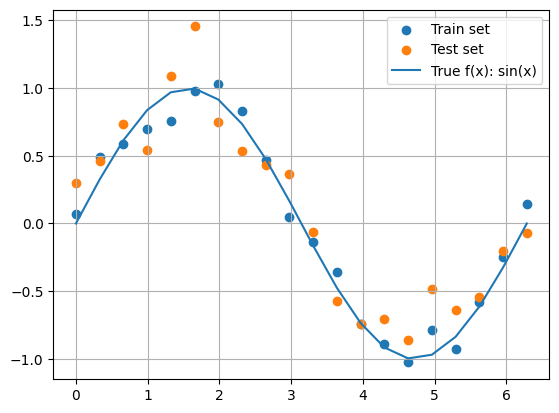

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: generate new data and plot
n_samples = 20
x_train = np.linspace(0, np.pi*2, n_samples)
x_test = np.linspace(0, np.pi*2, n_samples)
epsilon = 0.2

y_train = generate_sin(x_train, epsilon)

y_test = generate_sin(x_test, epsilon)

x_pure = np.linspace(0, np.pi*2, n_samples)
y_pure = np.sin(x_pure)

plt.scatter(x_train,y_train, label="Train set")
plt.scatter(x_test,y_test, label="Test set")

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()


#I don't understand what I'm doing wrong

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
train_losses = []
test_losses = []
coefficients_list = []

# Loop through polynomial degrees from 1 to 20
for degree in range(1, 21):
    coefficients = np.polyfit(x, y_train, degree)
    coefficients_list.append(coefficients)

    # Predict y values for both train and test sets
    y_pred_train = np.polyval(coefficients, x)
    y_pred_test = np.polyval(coefficients, x)

    # Compute and store MSE for both train and test sets
    train_loss = compute_mse(y_train, y_pred_train)
    test_loss = compute_mse(y_test, y_pred_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    #print
    print(f"Degree {degree}:")
    print(f"  Train Loss: {train_loss}")
    print(f"  Test Loss: {test_loss}")
    print(f"  Coefficients: {coefficients}\n")



Degree 1:
  Train Loss: 0.22860936488499806
  Test Loss: 0.20126198214008448
  Coefficients: [-1.979978    0.79850652]

Degree 2:
  Train Loss: 0.22793446390586103
  Test Loss: 0.20052808495794805
  Coefficients: [ 0.51315632 -2.38301003  0.84848662]

Degree 3:
  Train Loss: 0.016159630434512514
  Test Loss: 0.05151432473072425
  Coefficients: [ 43.8616464  -51.16012847  13.43841959  -0.05212761]

Degree 4:
  Train Loss: 0.0147965952838177
  Test Loss: 0.055178511899202226
  Coefficients: [ 1.72400956e+01  1.67809676e+01 -3.77059611e+01  1.12239033e+01
  1.47655592e-02]

Degree 5:
  Train Loss: 0.008215374096722582
  Test Loss: 0.04370816615402353
  Coefficients: [-1.88349755e+02  3.87063974e+02 -2.38544022e+02  3.49657441e+01
  3.82261014e+00  1.40638445e-01]

Degree 6:
  Train Loss: 0.008209637006867183
  Test Loss: 0.043890991002083365
  Coefficients: [-2.81071903e+01 -1.22123748e+02  3.28426761e+02 -2.14522787e+02
  3.04898792e+01  4.12907314e+00  1.37673768e-01]

Degree 7:
  Train

<ipython-input-55-d8578b8a3a50>:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y_train, degree)
<ipython-input-55-d8578b8a3a50>:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y_train, degree)
<ipython-input-55-d8578b8a3a50>:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y_train, degree)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

*Add your text answer here*

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

<ipython-input-56-1e1f4db9459f>:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, degree)


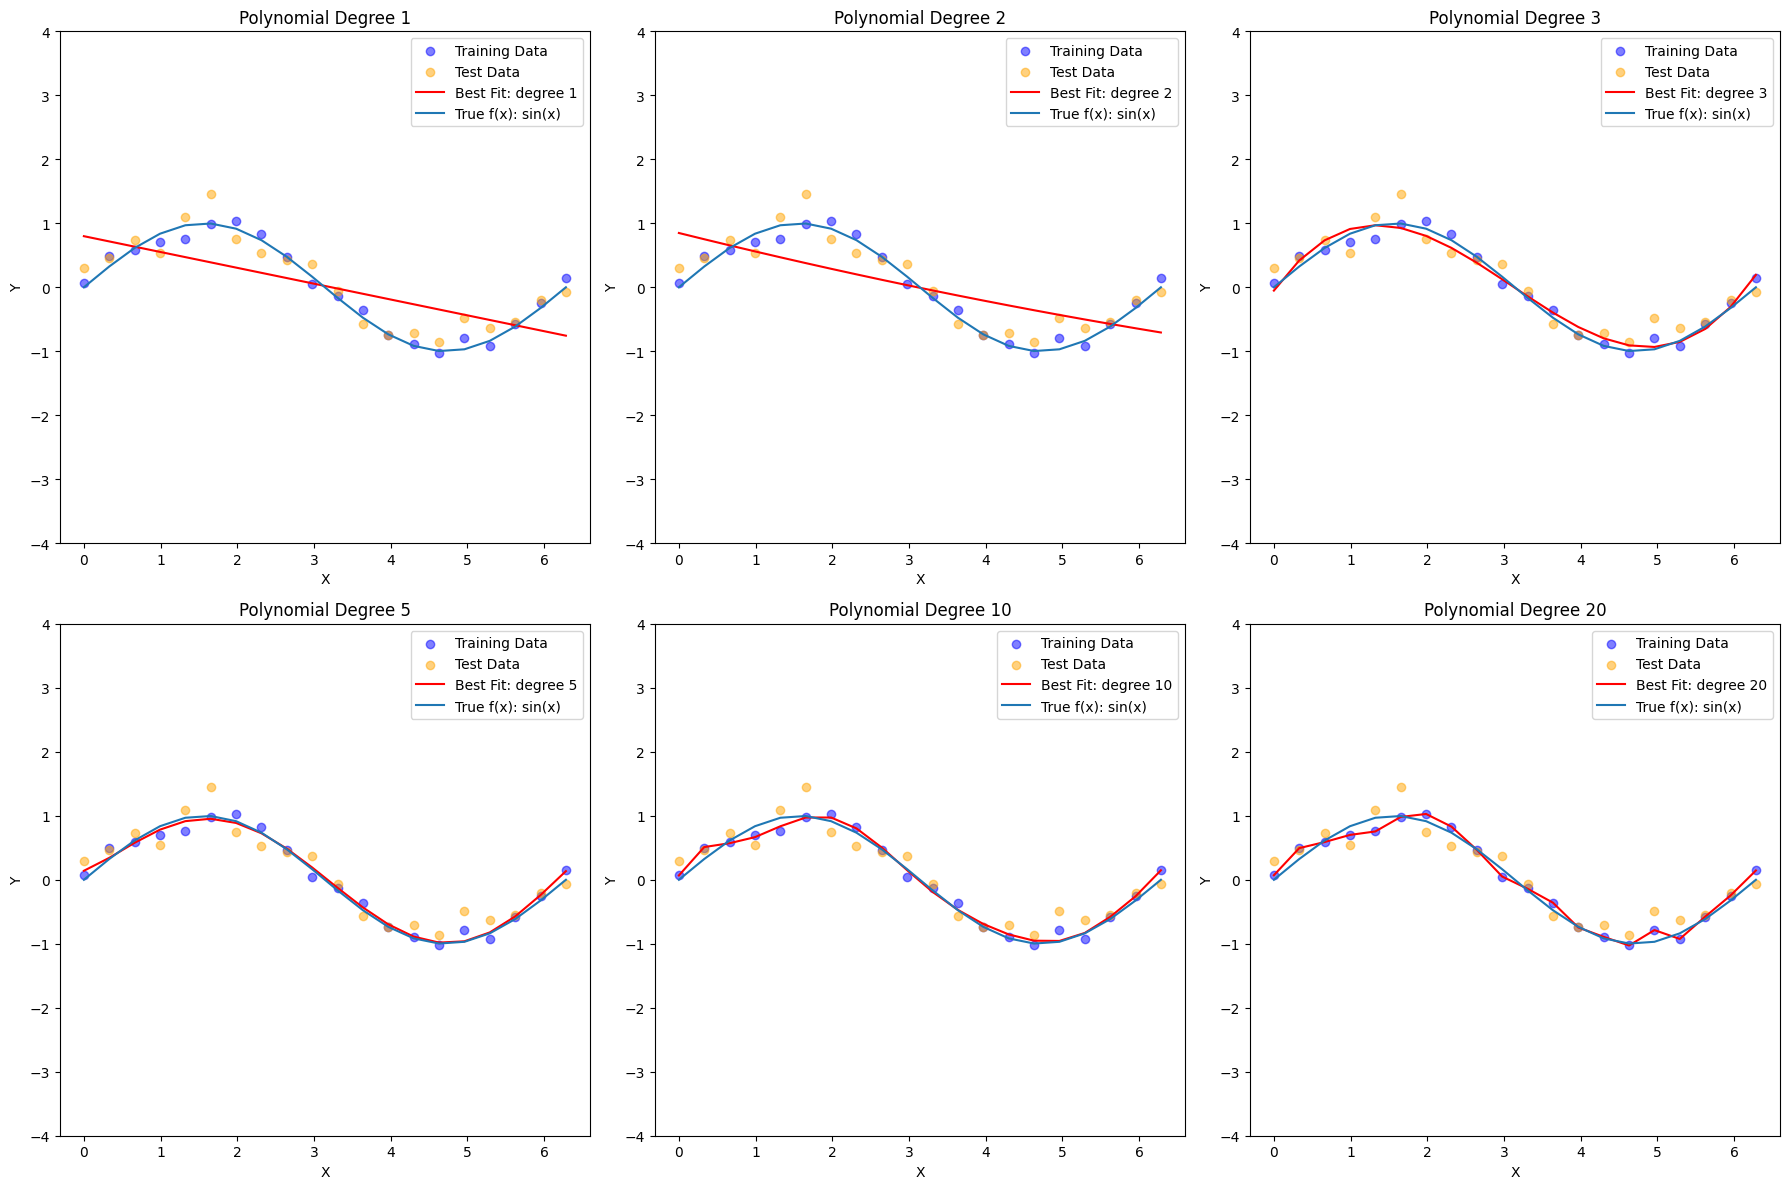

In [56]:
import numpy as np
import matplotlib.pyplot as plt

degrees = [1, 2, 3, 5, 10, 20]

plt.figure(figsize=(18, 12))

for i, degree in enumerate(degrees):
    coefficients = np.polyfit(x_train, y_train, degree)
    y_bestfit = np.polyval(coefficients, x_train)
    plt.subplot(2, 3, i+1)
    plt.scatter(x_train, y_train, label='Training Data', alpha=0.5, color='blue')
    plt.scatter(x_test, y_test, label='Test Data', alpha=0.5, color='orange')
    plt.plot(x_dense, y_bestfit, label=f'Best Fit: degree {degree}', color='red')
    plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.ylim(-4, 4)
    plt.legend()

plt.tight_layout()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

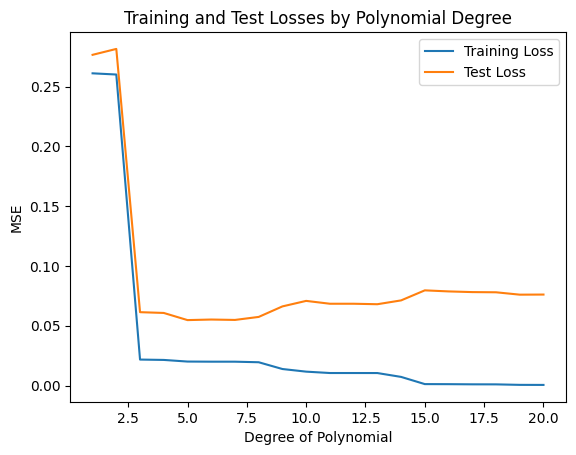

In [37]:

plt.plot(range(1, 21), train_losses, label='Training Loss')
plt.plot(range(1, 21), test_losses, label='Test Loss')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('Training and Test Losses by Polynomial Degree')
plt.legend()
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1.
I would say that they start overfitting at 10 degrees of freedom as at this point the line of best fit practically touches every single point of the training data set.

2. The model that would fit best to the training data is the data that captures the most variation in the training data. This would be the model with 20 degrees of freedom. The model that fits the underlying sine function the best are the models with 3 or 5 degrees of freedom. Therefore the model that captures the most vaiation in the training data does not fit the true sine model the best.

3. When I set n=200 I get errors showing that I have different x and y dimensions. I couldn't figure out what the root of the problem was

4.
I would assume that more training points would allow a more flexible model to have more opportunities to distinguish between the underlying pattern and the noise of the data. However, intuitively I think that the marginal benefit of additional training points diminishes as the total data increases. In other words that more data doesn't necessarily help more flexible models at certain point.

